**Sentiment Analysis of IMDB Movie Reviews**

**Problem Statement:**

In this, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

**Import necessary libraries**

In [1]:
#Load the libraries
import numpy as np              # used for working with arrays

import pandas as pd             # used for working with data sets

import seaborn as sns           # Python data visualization library based on matplotlib

import matplotlib.pyplot as plt 
# Matplotlib is a plotting library that allows users to create 2D plots and graphs. Pyplot provides a MATLAB-style interface to Matplotlib, making it easy to create plots without having to learn the details of Matplotlib's object-oriented API.

import nltk                     # a toolkit build for working with NLP in Python

from nltk.corpus import stopwords               # common words but don't add much useful information

from nltk.stem.porter import PorterStemmer      # used to reduce words to their root form

from nltk.stem import WordNetLemmatizer,LancasterStemmer         # used for lemmatization

from nltk.tokenize import word_tokenize,sent_tokenize   #used for word and sentence tokenizatiom

from nltk.tokenize.toktok import ToktokTokenizer            # used to tokenize text in a variety of languages

from wordcloud import WordCloud,STOPWORDS       
# data visualization technique used for representing text data in which the size of each word indicates its frequency.

from bs4 import BeautifulSoup                    # used to scrape information from web pages

import spacy                                     # used to build applications that process and understand large volumes of text

import re,string,unicodedata                     #  Regular Expression

from textblob import TextBlob           # used for processing textual data.

from textblob import Word
# TextBlob is a powerful library that can be used for a variety of NLP tasks like Sentiment Analysis, Parts of speech tagging, Classification..

from sklearn.feature_extraction.text import CountVectorizer     
# used for converting a collection of text documents into a numerical representation.

from sklearn.feature_extraction.text import TfidfVectorizer     # Tf-idf stands for Term Frequency-Inverse Document Frequency
# It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
# tf-idf value increases proportionally to the number of times a word appears in the document.
# TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features. 

from sklearn.preprocessing import LabelBinarizer # converting categorical labels into binary vectors.
#  LabelBinarizer class can be used to encode any type of categorical data, including strings, integers, and floats.

from sklearn.linear_model import LogisticRegression,SGDClassifier
# Logistic regression is a statistical model that is used to predict the probability of a binary event occurring. 
# SGDClassifier is machine learning algorithm that uses stochastic gradient descent to minimize a loss function. It is a linear classifier that can be used for binary classification or multi-class classification.

from sklearn.naive_bayes import MultinomialNB   # used for classification with discrete features (e.g., word counts for text classification). 
# It is often used as a baseline in text classification because it is fast and easy to implement.

from sklearn.svm import SVC             # used to fit to the data

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score   # used to calculate performance of the model

import warnings                         # used for issuing warnings
warnings.filterwarnings('ignore')       # hides all warning messages in a Jupyter Notebook cell where the warning occurs

**Import the training dataset**

In [38]:
#importing the training data
imdb_data=pd.read_csv('IMDB Dataset.csv')

# Tuple of rows and columns present in the dataset
print(imdb_data.shape)

# Prints the top 10 rows from the dataset
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


**Exploratery data analysis**

In [39]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**Sentiment count**

In [40]:
#sentiment count
imdb_data['sentiment'].value_counts()
# used to count the number of occurrences of each unique value 

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [41]:
# We can see that the dataset is balanced.

**Spliting the training dataset**

In [42]:
#split the dataset in 80:20 ratio

#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]

#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


**Text normalization**

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
#Tokenization of text
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

**Removing html strips and noise text**

In [45]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()                          # extracting text present inside the tags of html

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)            # extracting text present inside the square brackets

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)     # apply a function along one of the axis of the DataFrame
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


**Removing special characters**

In [46]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)        #here re.sub() is used to replace the special characters with the blank character
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


**Text stemming**

In [47]:
'''
#Stemming the text
def simple_stemmer(text):
    ps=nltk.stem.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)
imdb_data
'''

"\n#Stemming the text\ndef simple_stemmer(text):\n    ps=nltk.stem.porter.PorterStemmer()\n    text= ' '.join([ps.stem(word) for word in text.split()])\n    return text\n\n#Apply function on review column\nimdb_data['review']=imdb_data['review'].apply(simple_stemmer)\nimdb_data\n"

In [48]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sharo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sharo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sharo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
# Lemmatization the text
def simple_lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    # Optional: Use POS tags for more accurate lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(simple_lemmatizer)

**Removing stopwords**

In [50]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]        # removing leading and trailing whitespaces from each token
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)
imdb_data

{'some', 'at', 'through', 'am', 'of', 'again', 'is', 'all', 'an', 'which', "you'll", "you've", 'now', "haven't", "that'll", 'because', 'y', 'were', 'does', 'your', 'she', 'who', 'for', 'he', 'ma', 'ain', 'their', 'her', 'where', 'yourselves', 'to', 'on', 'shan', 'while', "you'd", 'and', 'wouldn', 'herself', 'my', 'nor', 'do', 'the', 'was', "aren't", 'it', 'having', 'after', 'out', 'further', 'we', 'them', 'very', 'him', 'between', 'into', 'ourselves', 'been', 'too', 'me', 'most', "shouldn't", 'ours', 'll', 'in', 'm', 'won', 'any', 'above', 'i', 'myself', 'over', 'why', 'hadn', "didn't", 'but', 'what', "doesn't", 'as', 'during', "mightn't", 'no', 're', 'with', 'hers', 've', "it's", 'themselves', 'its', 'have', 'against', 'both', 'itself', 'didn', 'yourself', 'once', 'doesn', 'such', 'his', 'd', 'himself', 'haven', "shan't", 'a', 'wasn', 'these', 'o', "weren't", 'doing', 'under', "needn't", "hasn't", 't', 'can', 'so', 'about', 'has', "wouldn't", 's', 'how', 'more', 'mustn', 'then', "coul

,review,sentiment
0,One reviewer ha mentioned watching 1 Oz episod...,positive
1,wonderful little production filming technique ...,positive
2,thought wa wonderful way spend time hot summer...,positive
3,Basically family little boy Jake think zombie ...,negative
4,Petter Matteis Love Time Money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,Catholic taught parochial elementary school nu...,negative
49998,Im going disagree previous comment side Maltin...,negative


**Normalized train reviews**

In [51]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'One reviewer ha mentioned watching 1 Oz episode youll hooked right exactly happened meThe first thing struck Oz wa brutality unflinching scene violence set right word GO Trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordIt called OZ nickname given Oswald Maximum Security State Penitentary focus mainly Emerald City experimental section prison cell glass front face inwards privacy high agenda Em City home manyAryans Muslims gangsta Latinos Christians Italians Irish moreso scuffle death stare dodgy dealing shady agreement never far awayI would say main appeal show due fact go show wouldnt dare Forget pretty picture painted mainstream audience forget charm forget romanceOZ doesnt mess around first episode ever saw struck nasty wa surreal couldnt say wa ready watched developed taste Oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate

**Normalized test reviews**

In [52]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

'read review watching piece cinematic garbage took least 2 page find somebody else didnt think appallingly unfunny montage WASNT acme humour 70 indeed era isnt least funny set sketch comedy Ive ever seen itll till come along Half skit already done infinitely better act Monty Python Woody Allen wa say nice piece animation last 90 second highlight film would still get close summing mindless drivelridden waste 75 minute Seminal comedy world seminal really mean semen Scatological humour world scat actually feces Precursor joke mean handbook comedy Tits bum odd beaver Niceif pubescent boy least one hand free havent found Playboy exists Give break wa early 70 way sketch comedy going back least ten year prior way could even forgive film even made wa gunpoint Retro Hardly Sketches clown subtly perverting child may cutting edge circle could actually funny come really quite sad kept going throughout entire 75 minute Sheer belief may saved genuinely funny skit end gave film 1 wa lower scoreand re

**Bags of words model**

It is used to convert text documents to numerical vectors or bag of words.

In [53]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=1,max_df=1.0,binary=False,ngram_range=(1,3))

#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)

#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

# vocab=cv.get_feature_names()    #to get feature names

BOW_cv_train: (40000, 7214882)
BOW_cv_test: (10000, 7214882)


**Term Frequency-Inverse Document Frequency model (TFIDF)**

It is used to convert text documents to  matrix of  tfidf features.

In [54]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=1,max_df=1.0,use_idf=True,ngram_range=(1,3))

#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)

#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 7214882)
Tfidf_test: (10000, 7214882)


**Labeling the sentiment text**

In [55]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


**Split the sentiment tdata**

In [56]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


**Modelling the dataset**

Let us build logistic regression model for both bag of words and tfidf features

In [57]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


**Logistic regression model performane on test dataset**

In [58]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]


**Accuracy of the model**

In [59]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.8489
lr_tfidf_score : 0.8846


**Print the classification report**

In [60]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.82      0.89      0.85      4993
    Negative       0.88      0.81      0.84      5007

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.88      4993
    Negative       0.88      0.89      0.89      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



**Confusion matrix**

In [61]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4043  964]
 [ 547 4446]]
[[4446  561]
 [ 593 4400]]


**Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features**

In [62]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


**Model performance on test data**

In [63]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]


**Accuracy of the model**

In [64]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.8491
svm_tfidf_score : 0.8835


**Print the classification report**

In [65]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.82      0.89      0.86      4993
    Negative       0.88      0.80      0.84      5007

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

              precision    recall  f1-score   support

    Positive       0.89      0.87      0.88      4993
    Negative       0.88      0.90      0.88      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



**Plot the confusion matrix**

In [66]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4028  979]
 [ 530 4463]]
[[4482  525]
 [ 640 4353]]


**Multinomial Naive Bayes for bag of words and tfidf features**

In [67]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


**Model performance on test data**

In [68]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


**Accuracy of the model**

In [69]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.8779
mnb_tfidf_score : 0.8881


**Print the classification report**

In [70]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.85      0.91      0.88      4993
    Negative       0.90      0.85      0.87      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.88      0.90      0.89      4993
    Negative       0.90      0.88      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**Plot the confusion matrix**

In [71]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4232  775]
 [ 446 4547]]
[[4390  617]
 [ 502 4491]]


**Let us see positive and negative words by using WordCloud.**

**Word cloud for positive review words**

<function matplotlib.pyplot.show(close=None, block=None)>

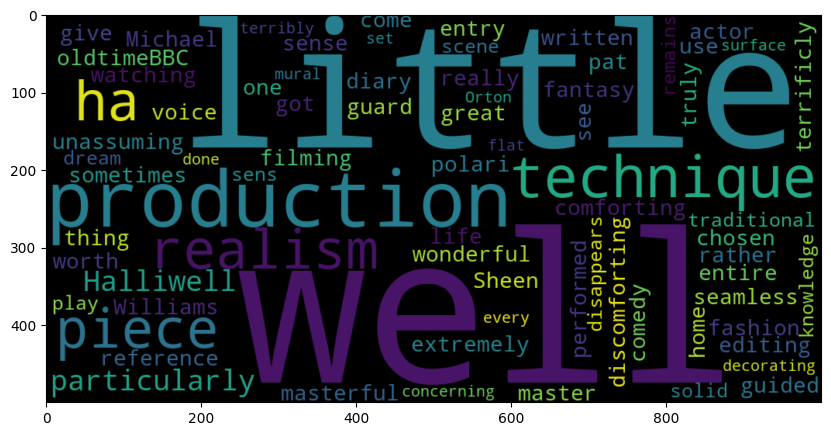

In [72]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

**Word cloud for negative review words**

<function matplotlib.pyplot.show(close=None, block=None)>

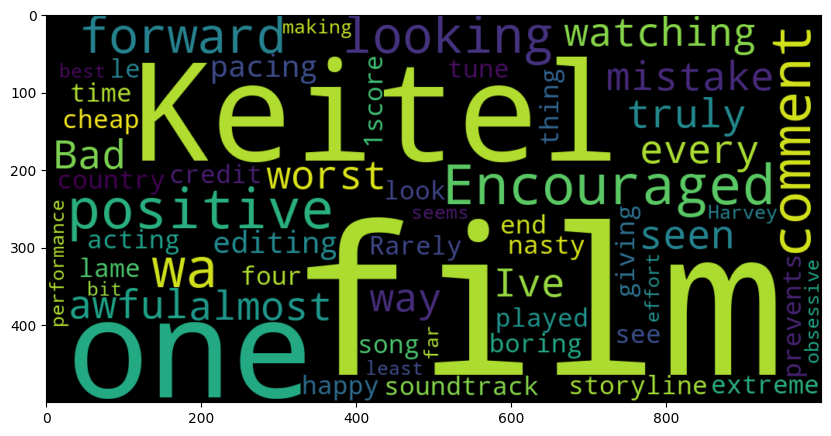

In [73]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

**Conclusion:**
* We can observed that both logistic regression and multinomial naive bayes model performing well compared to linear support vector  machines.
* Still we can improve the accuracy of the models by preprocessing data and by using lexicon models like Textblob.